In [46]:
# Assignment on Classification technique.
# Every year many students give the GRE exam to get admission in foreign Universities. The  data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating  (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out  of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no,  1=yes). Admitted is the target variable.  

# Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions 

# The counselor of the firm is supposed check whether the student will get an admission or not  based on his/her GRE score and Academic Score. So to help the counselor to take appropriate  decisions build a machine learning model classifier using Decision tree to predict whether a  student will get admission or not. 
# a) Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary.  
# b) Perform data-preparation (Train-Test Split) 
# c) Apply Machine Learning Algorithm 
# d) Evaluate Model. 

In [16]:
# Importing required Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import plot_tree

In [17]:
# Dataset Loading

df=pd.read_csv('Admission_Predict.csv')

In [18]:
# Data Visualization

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [21]:
df.shape

(400, 9)

In [22]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [23]:
(df==0).sum()

Serial No.             0
GRE Score              0
TOEFL Score            0
University Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research             181
Chance of Admit        0
dtype: int64

In [27]:
df.columns = [c.replace(" ", "") for c in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         400 non-null    int64  
 1   GREScore          400 non-null    int64  
 2   TOEFLScore        400 non-null    int64  
 3   UniversityRating  400 non-null    int64  
 4   SOP               400 non-null    float64
 5   LOR               400 non-null    float64
 6   CGPA              400 non-null    float64
 7   Research          400 non-null    int64  
 8   ChanceofAdmit     400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [28]:
df.loc[df['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
df.loc[df['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1

In [29]:
# Splitting the dataset

from sklearn.model_selection import train_test_split

X = df.drop(['ChanceofAdmit','SerialNo.'],axis=1)
y = df['ChanceofAdmit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
# Model fitting

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [31]:
print("Confusion matrix:\n")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:

[[65  6]
 [ 3 26]]


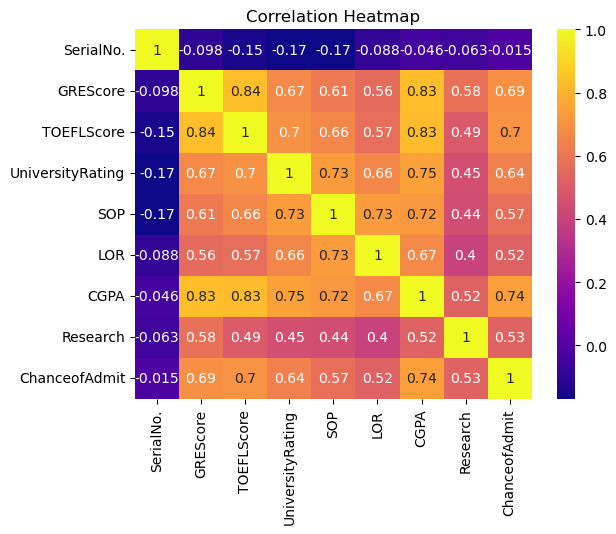

In [43]:
# Heatmap for understanding the co relation between different features

corr = df.corr()

sns.heatmap(corr, annot=True, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()

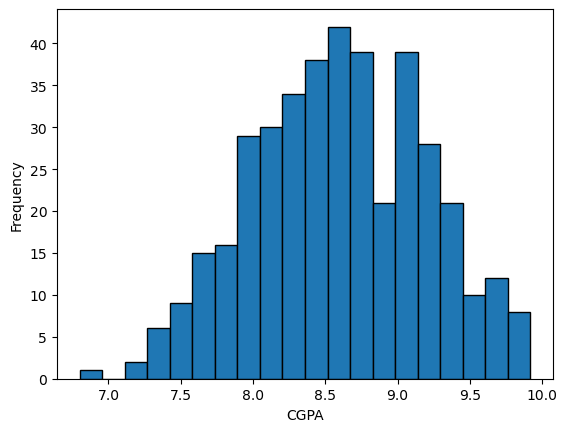

In [45]:
plt.hist(df['CGPA'], bins=20, edgecolor='black')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Metrics of the model

print("1. Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(y_test, y_pred))

1. Accuracy Score: 0.91
2. Precision Score: 0.8125
3. Recall Score: 0.896551724137931
4. f1 Score: 0.8524590163934426


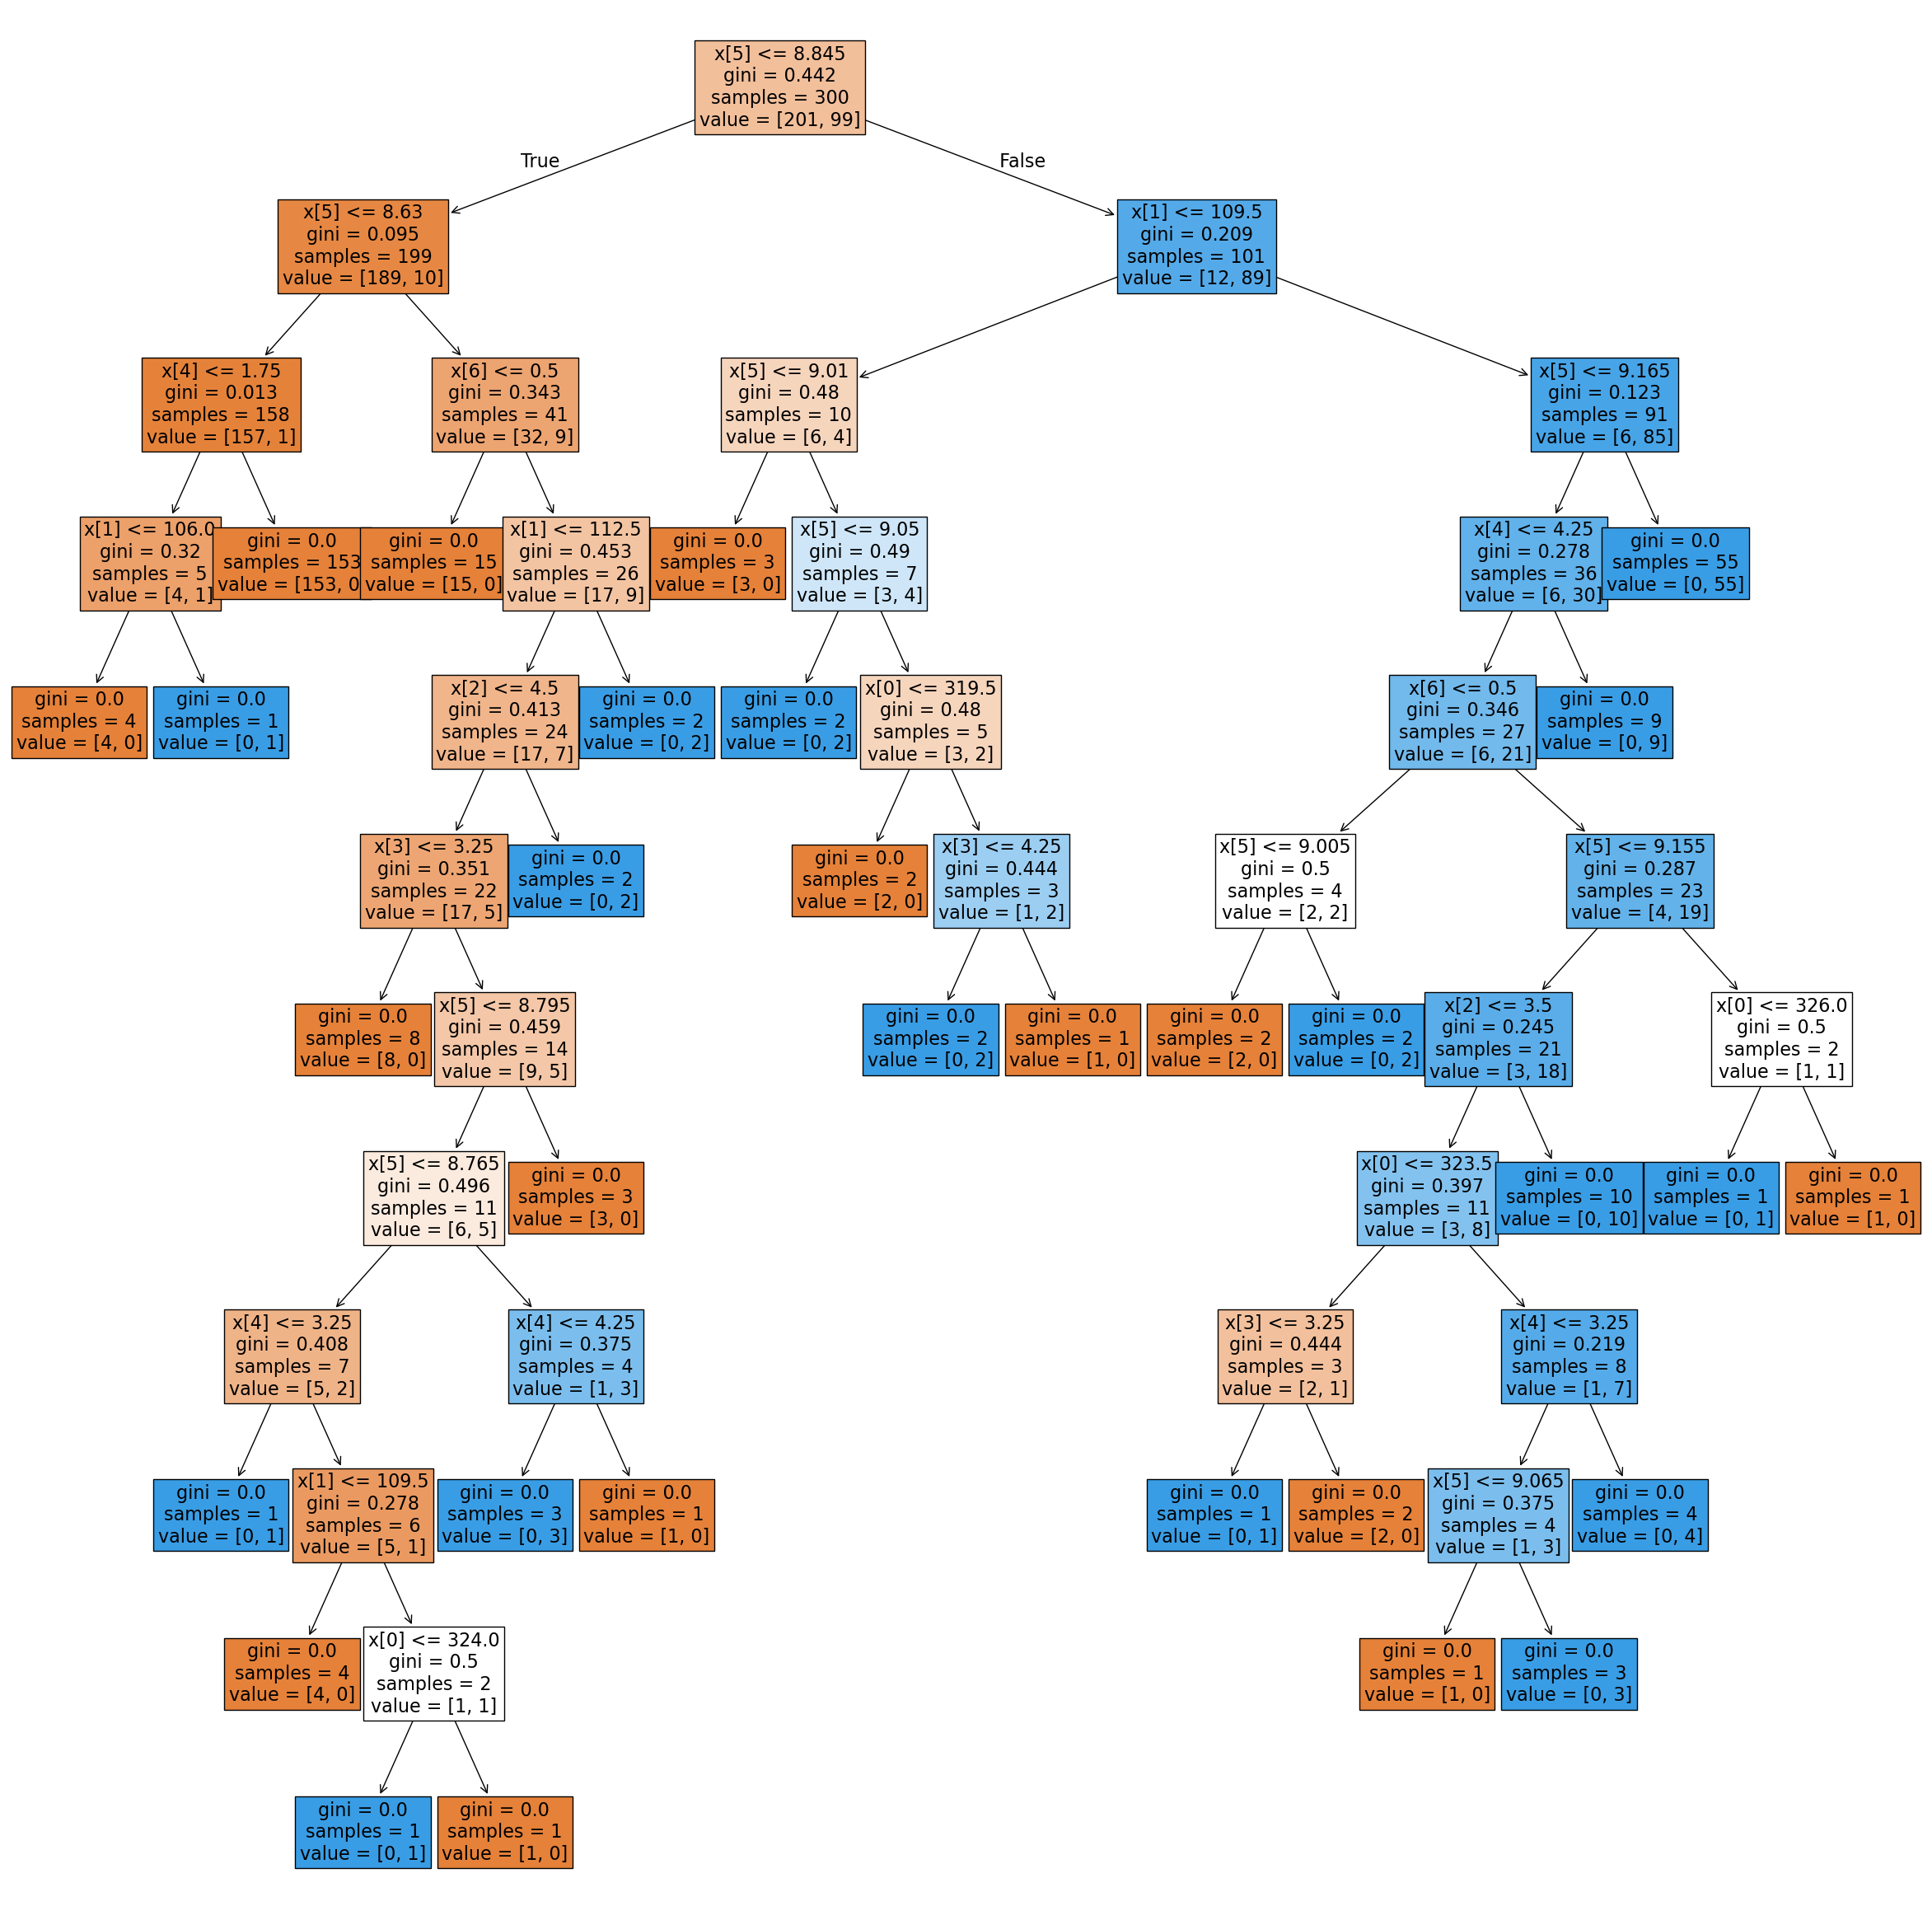

In [33]:
# Decision Tree

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, fontsize=16)
plt.show()